In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import seaborn.objects as so
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv("dane_powiaty.csv", sep=';', decimal=',')
pd.options.display.float_format = '{:.4f}'.format

In [3]:
df

,POWIAT,DOCH,LUDN,PROD,WYN,BEZR,MIESZ,ZIEL,ROW
0,Powiat ciechanowski,1334.1800,84,55778,4967.9700,1298,425,38.5100,56.9000
1,Powiat garwoliński,1373.1100,85,68402,4708.2100,2062,503,33.1800,8.1000
2,Powiat gostyniński,1557.0800,73,28059,4637.2800,1047,99,28.2600,16.8000
3,Powiat grodziski,1310.1500,266,59690,5761.5100,406,920,68.0000,36.4000
4,Powiat grójecki,1293.5000,77,60569,5088.2800,387,342,38.8500,22.6000
5,Powiat kozienicki,1252.8900,65,36928,5467.1100,1462,202,23.8700,25.8000
6,Powiat legionowski,1077.5300,307,74078,5059.5300,1146,1610,78.5000,95.5000
7,Powiat łosicki,1524.9600,40,18718,4486.1000,312,66,6.4800,4.5000
8,Powiat makowski,1405.5300,42,27835,4461.2500,1786,99,5.5000,2.4000
9,Powiat miński,1205.2200,133,96676,4717.2100,1345,921,52.8400,39.9000


<h3>Standardyzacja danych</h3>

In [4]:
## Usunięcie danych tekstowych i normalizacja danych. Pozostawienie wyłącznie znormalizowanych danych liczbowych
temp_df = df.drop('POWIAT',axis=1)
df_st = (temp_df-temp_df.mean())/temp_df.std()

In [5]:
df.describe()

,DOCH,LUDN,PROD,WYN,BEZR,MIESZ,ZIEL,ROW
count,34.0000,34.0000,34.0000,34.0000,34.0000,34.0000,34.0000,34.0000
mean,1435.5471,123.3235,56367.0000,4910.4521,1283.3235,619.9412,30.9406,48.0147
std,262.9060,125.8512,30739.8755,535.8842,870.9765,745.2395,28.4479,47.4190
min,931.8100,40.0000,18718.0000,4157.7800,312.0000,66.0000,2.6300,2.4000
25%,1291.5425,55.2500,32928.5000,4570.9775,713.0000,172.0000,9.5150,22.8250
50%,1412.2500,75.0000,50895.0000,4680.9200,1184.5000,351.0000,19.0400,34.4500
75%,1524.6150,128.5000,71183.7500,5106.8575,1613.0000,607.2500,48.8500,66.9000
max,2301.1400,677.0000,159485.0000,6295.4000,4961.0000,3190.0000,105.8800,243.9000


In [6]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,DOCH,LUDN,PROD,WYN,BEZR,MIESZ,ZIEL,ROW
DOCH,1.000000,-0.282157,-0.365505,-0.313494,-0.001254,-0.267673,-0.165272,-0.277508
LUDN,-0.282157,1.000000,0.623192,0.663311,-0.041004,0.760083,0.717963,0.425887
PROD,-0.365505,0.623192,1.000000,0.347622,0.365654,0.874993,0.407340,0.466868
WYN,-0.313494,0.663311,0.347622,1.000000,-0.290310,0.477636,0.477553,0.312301
BEZR,-0.001254,-0.041004,0.365654,-0.290310,1.000000,0.136160,0.085558,0.028122
MIESZ,-0.267673,0.760083,0.874993,0.477636,0.136160,1.000000,0.534014,0.458320
ZIEL,-0.165272,0.717963,0.407340,0.477553,0.085558,0.534014,1.000000,0.182153
ROW,-0.277508,0.425887,0.466868,0.312301,0.028122,0.458320,0.182153,1.000000


<AxesSubplot: >

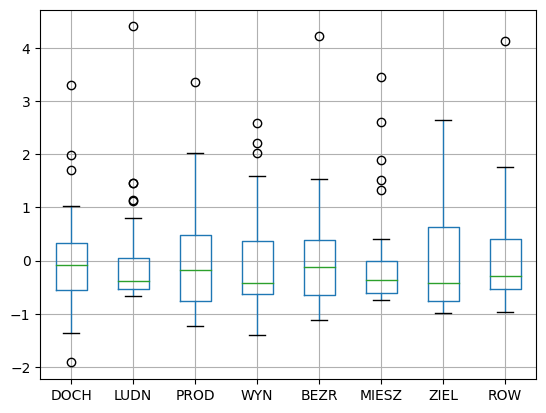

In [7]:
df_st.boxplot()

<h2>Porządkowanie liniowe</h2>

In [8]:
## Zamiana na stymulanty
# Bezrobocie - destymulanta, ludność - nominanta, pozostałe stymulamty
df2 = pd.DataFrame()
df2['POWIAT'] = df["POWIAT"]
ludn=[]
for i in df['LUDN']:
    if i == 110:
        ludn.append(1)
    elif i > 110:
        z = 1/(i-110+1)
        ludn.append(z)
    else:
        z = -1/(i-110-1)
        ludn.append(z)
df2['LUDN'] = ludn
df2['BEZR'] = -df['BEZR']
df2[['DOCH','PROD','WYN','MIESZ','ZIEL','ROW']] = df[['DOCH','PROD','WYN','MIESZ','ZIEL','ROW']]
#df2

In [9]:
## Standaryzacja danych
df3 = pd.DataFrame()
for column in df2:
    if df2[column].dtype == 'float64' or df2[column].dtype == 'int64':
        for i in range(0,len(df2[column])):
            df3[column] = (df2[column] - df2[column].mean()) / df2[column].std()
    else:
        df3[column] = df2[column]
#df3

In [10]:
# Wyznaczanie wzorca - najlepszego możliwego wyniku dla każdego atrybutu
wzorzec = {}
for column in df3.select_dtypes(include=float):
    wzorzec[column] = df3[column].max()
wzorzec_df = pd.DataFrame(data=wzorzec,index=[0])
wzorzec_df

,LUDN,BEZR,DOCH,PROD,WYN,MIESZ,ZIEL,ROW
0,4.0486,1.1152,3.2924,3.3545,2.5844,3.4486,2.6343,4.1309


In [11]:
# Obliczanie odchyleń od wzorca i odległości obiektów od wzorca
df4 = pd.DataFrame()
for column in df3:
    if df3[column].dtype == 'float64' or df3[column].dtype == 'int64':
        for i in range(0,len(df3[column])):
            df4[column+"_odch"] = (df3[column] - wzorzec_df[column].mean())**2
    else:
        df4[column] = df3[column]
df4["odleglosc"] = np.sqrt(df4.sum(axis='columns',numeric_only=True))
#df4

In [12]:
##Odległość "możliwie daleka"
srednia = df4.odleglosc.mean()
odch_std = df4.odleglosc.std()
d0 = srednia + 2 * odch_std

##Tworzenie rankingu na podstawie odległości od wozrca i możliwie dalekiej odległości d0
ranking = pd.DataFrame()
ranking["POWIAT"] = df4["POWIAT"]
ranking["Hellwig"] = 1 - (df4["odleglosc"]/d0)
ranking.sort_values(by=["Hellwig"],ascending=False).reset_index(drop=True)

,POWIAT,Hellwig
0,Powiat warszawski zachodni,0.3692
1,Powiat pruszkowski,0.3686
2,Powiat piaseczyński,0.3628
3,Powiat wołomiński,0.2684
4,Powiat legionowski,0.2536
5,Powiat sochaczewski,0.2509
6,Powiat nowodworski,0.2494
7,Powiat miński,0.2303
8,Powiat grodziski,0.2292
9,Powiat otwocki,0.2127


<h2>Analiza skupień</h2>

In [13]:
##Dane zestandaryzowane bez nazw powiatów
df_st

,DOCH,LUDN,PROD,WYN,BEZR,MIESZ,ZIEL,ROW
0,-0.3856,-0.3125,-0.0192,0.1073,0.0169,-0.2616,0.2661,0.1874
1,-0.2375,-0.3045,0.3915,-0.3774,0.8940,-0.1569,0.0787,-0.8417
2,0.4623,-0.3999,-0.9209,-0.5098,-0.2713,-0.6990,-0.0942,-0.6583
3,-0.4770,1.1337,0.1081,1.5881,-1.0073,0.4026,1.3027,-0.2449
4,-0.5403,-0.3681,0.1367,0.3318,-1.0291,-0.3730,0.2780,-0.5360
5,-0.6948,-0.4634,-0.6324,1.0388,0.2051,-0.5608,-0.2485,-0.4685
6,-1.3618,1.4595,0.5762,0.2782,-0.1577,1.3285,1.6718,1.0014
7,0.3401,-0.6621,-1.2248,-0.7919,-1.1152,-0.7433,-0.8598,-0.9177
8,-0.1142,-0.6462,-0.9282,-0.8382,0.5771,-0.6990,-0.8943,-0.9620
9,-0.8761,0.0769,1.3113,-0.3606,0.0708,0.4040,0.7698,-0.1711


<h3>Grupowanie działowe - Metoda K-średnich</h3>

In [14]:
## Redukcja atrybutów do 2 wartości w celu łatwiejszego zobrazowania skupień
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_st)
print('Wytłumaczenie wariancji przez każdą ze składowych wartości: {}'.format(pca_2.explained_variance_ratio_))
print('Całkowita wariancja tłumaczona przez obie wartości: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
dim1 = 'dim1 - {:.2%}'.format(pca_2.explained_variance_ratio_[0])
dim2 = 'dim2 - {:.2%}'.format(pca_2.explained_variance_ratio_[1])

Wytłumaczenie wariancji przez każdą ze składowych wartości: [0.47749448 0.17086786]
Całkowita wariancja tłumaczona przez obie wartości: 64.84%


In [15]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_st.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



        DOCH   LUDN   PROD    WYN   BEZR  MIESZ   ZIEL    ROW
PC_1 0.2341 0.4593 0.4247 0.3528 0.0481 0.4566 0.3590 0.2997
PC_2 0.0399 0.1502 0.3597 0.4601 0.7760 0.1450 0.0911 0.0569


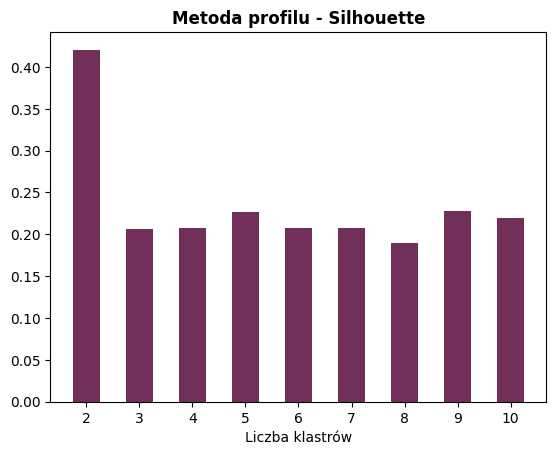

In [16]:
## Obliczanie optymalnej ilości klastrów przy pomocy metody Silhouette
parameters = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()
silhouette_scores = []
# Ewaluacja na podstawie współczynnika silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(df_st)
    ss = silhouette_score(df_st, kmeans_model.labels_)
    silhouette_scores += [ss]
    if ss > best_score:
        best_score = ss
        best_grid = p
# Stworzenie wykresu współczynników dla poszczególnych ilości klastrów
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Metoda profilu - Silhouette', fontweight='bold')
plt.xlabel('Liczba klastrów')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_st)
y_kmeans = kmeans.predict(df_st)
sklearn_centers = kmeans.cluster_centers_
centroids_pca = pca_2.transform(sklearn_centers)

c:\users\pawki\pycharmprojects\statystyczna_analiza\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [18]:
df_final = pd.DataFrame()
df_final['dim1'] = pca_2_result[:, 0]
df_final['dim2'] = pca_2_result[:, 1]
df_final['kmean_cluster'] = y_kmeans
powiaty = [powiat[7:] for powiat in df["POWIAT"]]
df_final['POWIAT'] = powiaty

In [19]:
df_test = pd.DataFrame()
df_test['x'] = centroids_pca[:, 0]
df_test['y'] = centroids_pca[:, 1]

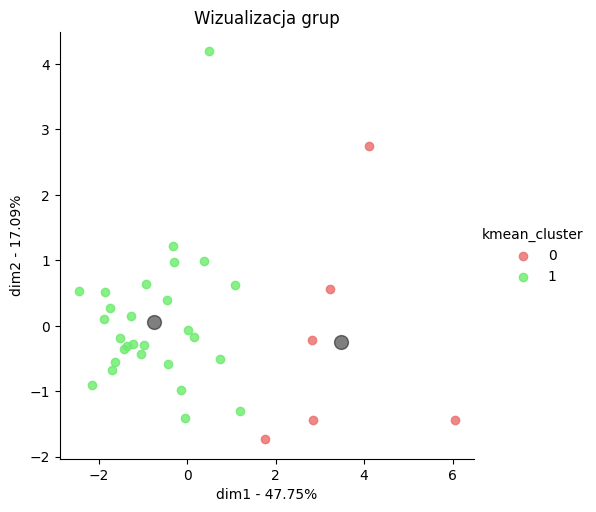

In [20]:
sns.lmplot(data=df_final, x='dim1', y='dim2', fit_reg=False, hue = 'kmean_cluster', palette = ['#eb6c6a', '#6aeb6c', '#6c6aeb', '#b37f2d']).set(title='Wizualizacja grup')
plt.xlabel(dim1)
plt.ylabel(dim2)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=100, alpha=0.5)
plt.show()

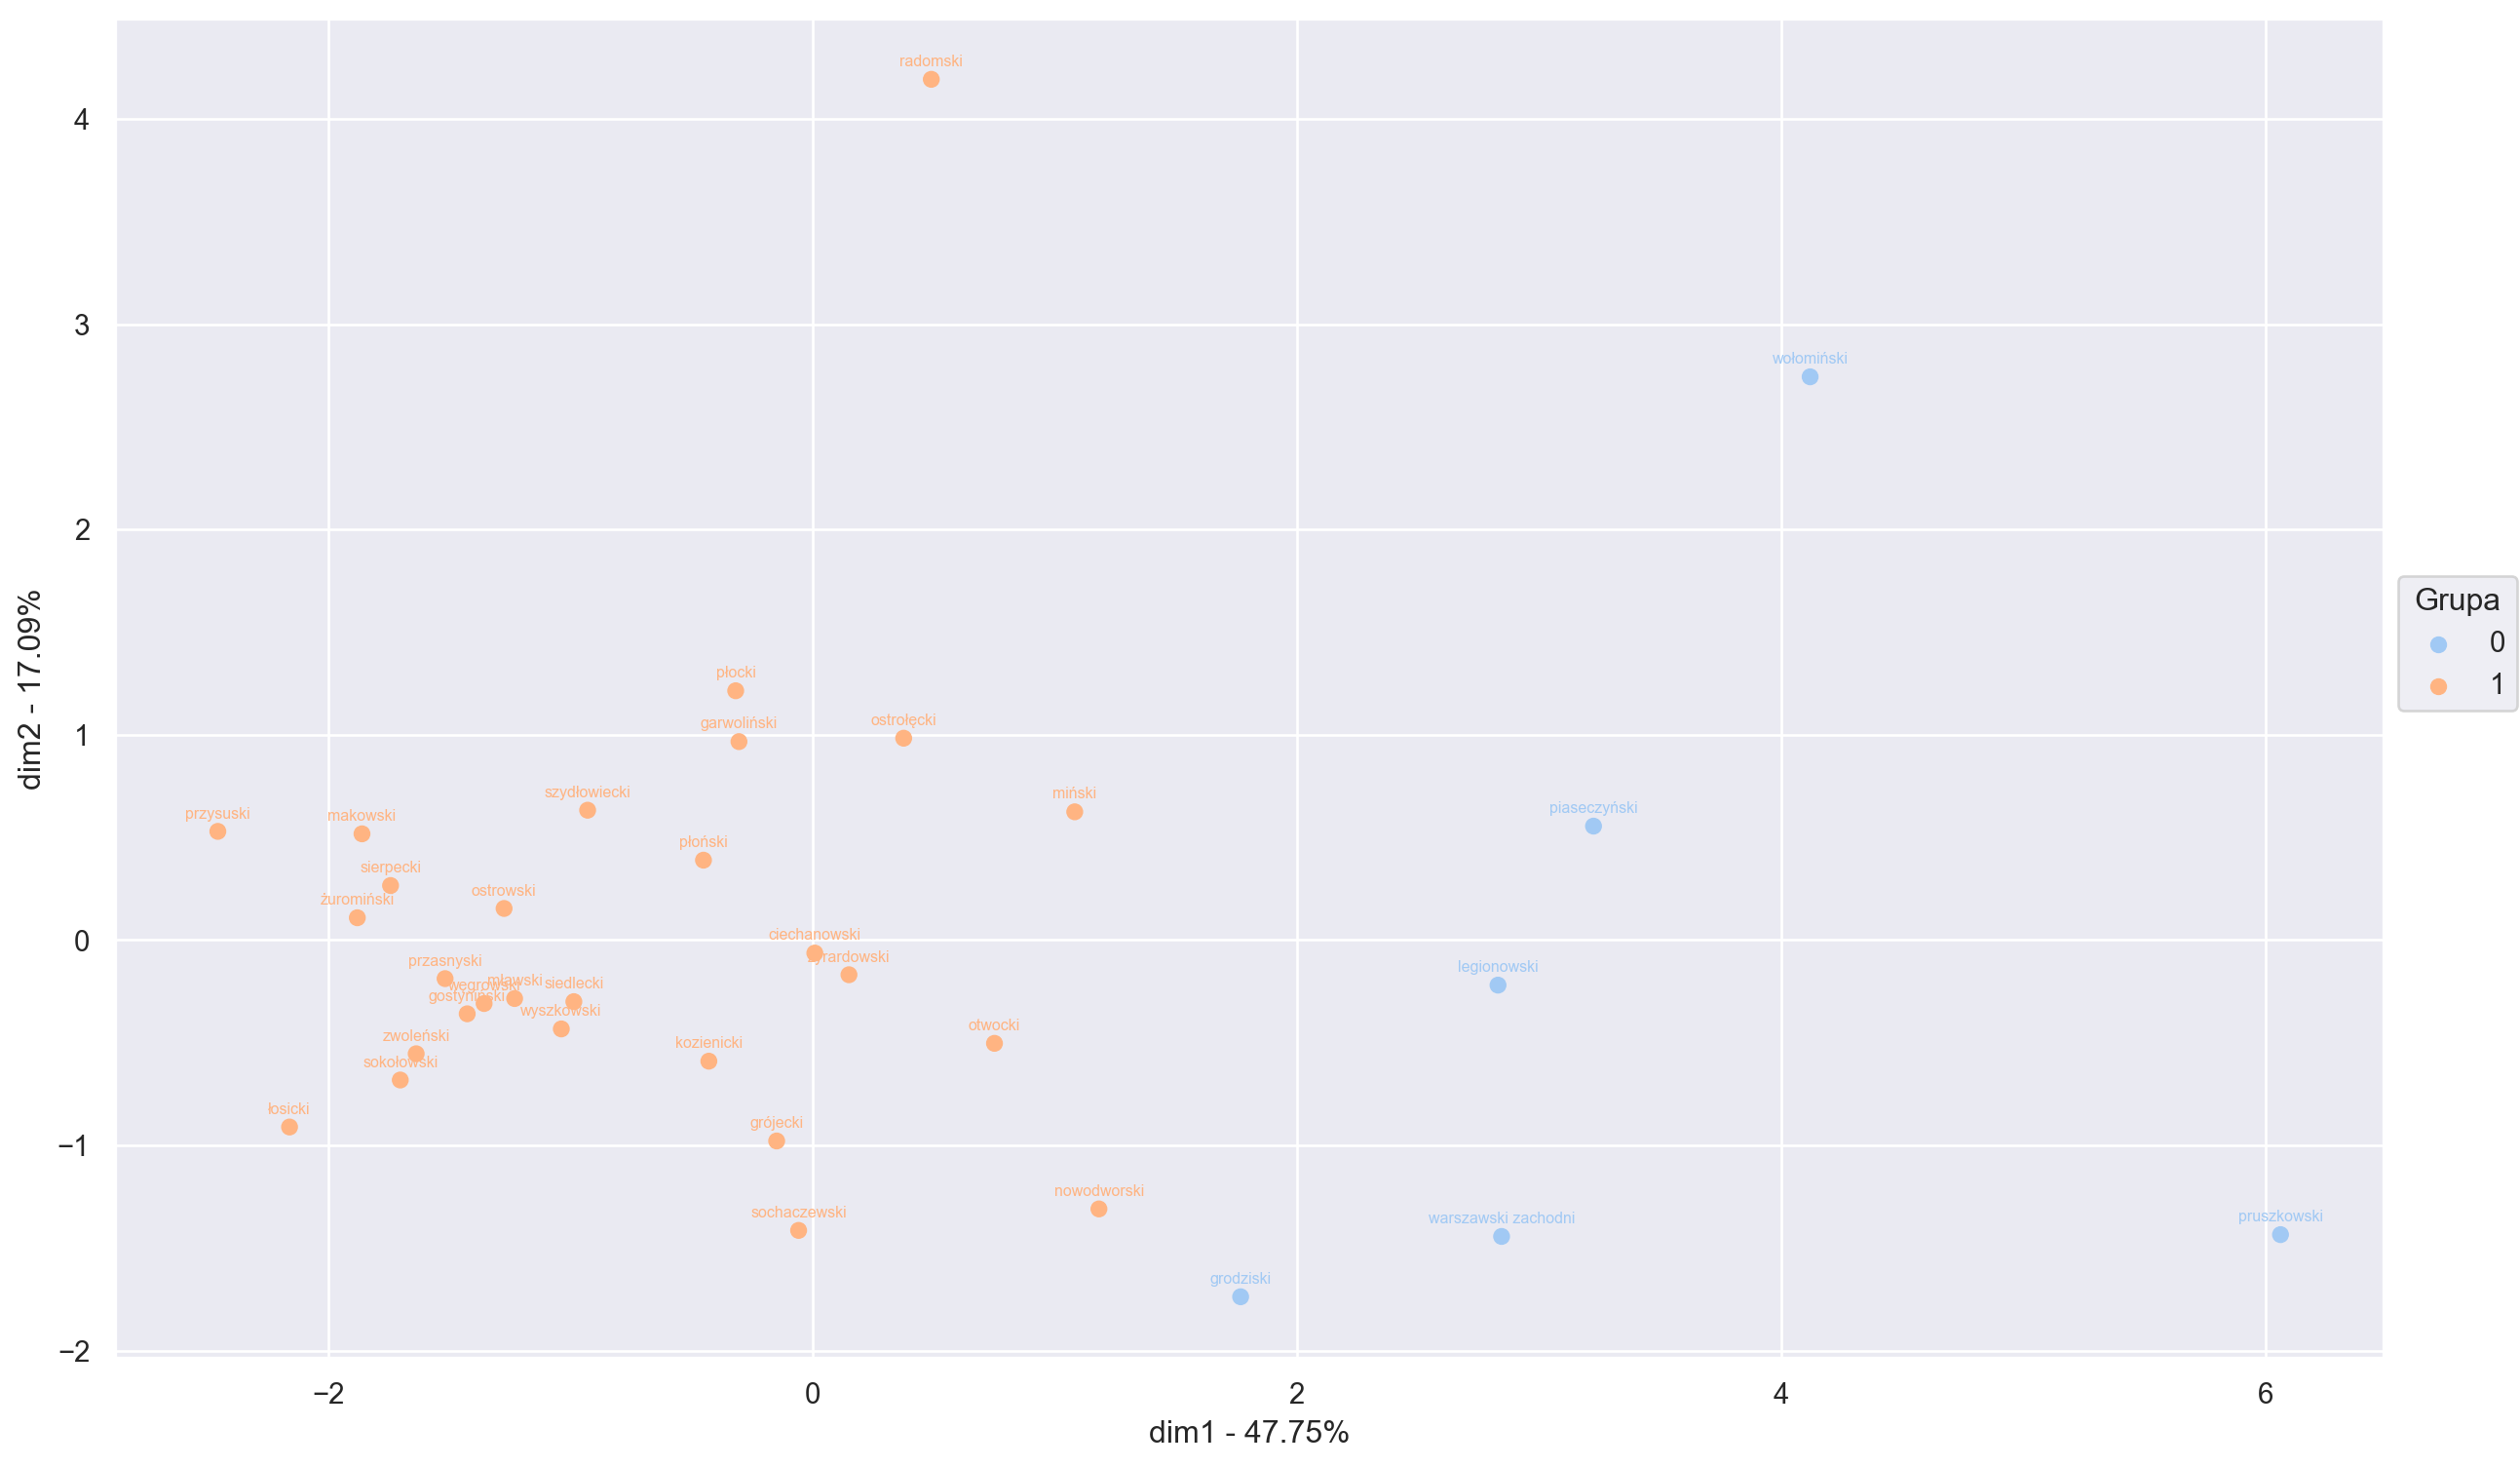

In [21]:
p = (
    so.Plot(df_final, x="dim1", y="dim2", text="POWIAT", color="kmean_cluster")
    .add(so.Dot())
    .add(so.Text(valign="bottom", fontsize=6))
    .scale(color="pastel")
    .layout(size=(13,8))
)
p.label(x=dim1, y=dim2, color='Grupa')

<h3>Grupowanie hierarchiczne - Metoda Warda</h3>

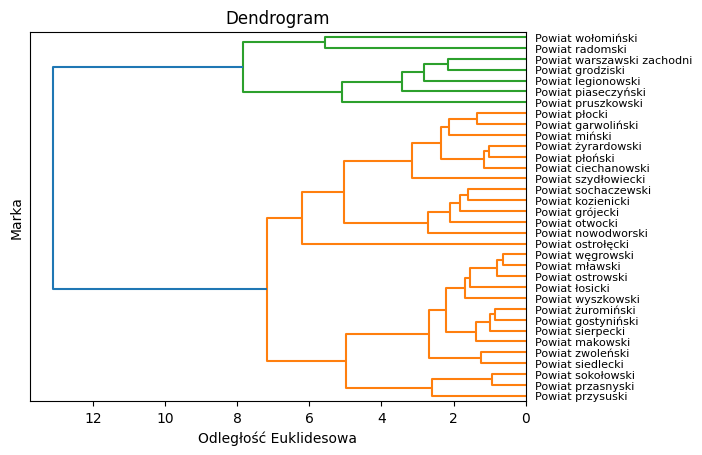

In [22]:
labels = [i for i in df.POWIAT]
model = sch.linkage(df_st, method  = "ward", metric='euclidean')
dendrogram = sch.dendrogram(model, labels=labels, orientation='left')
plt.title('Dendrogram')
plt.xlabel('Odległość Euklidesowa')
plt.ylabel('Marka')
plt.show()

In [23]:
clusters = sch.fcluster(model, 2, criterion='maxclust')
df_final['ward_cluster'] = clusters

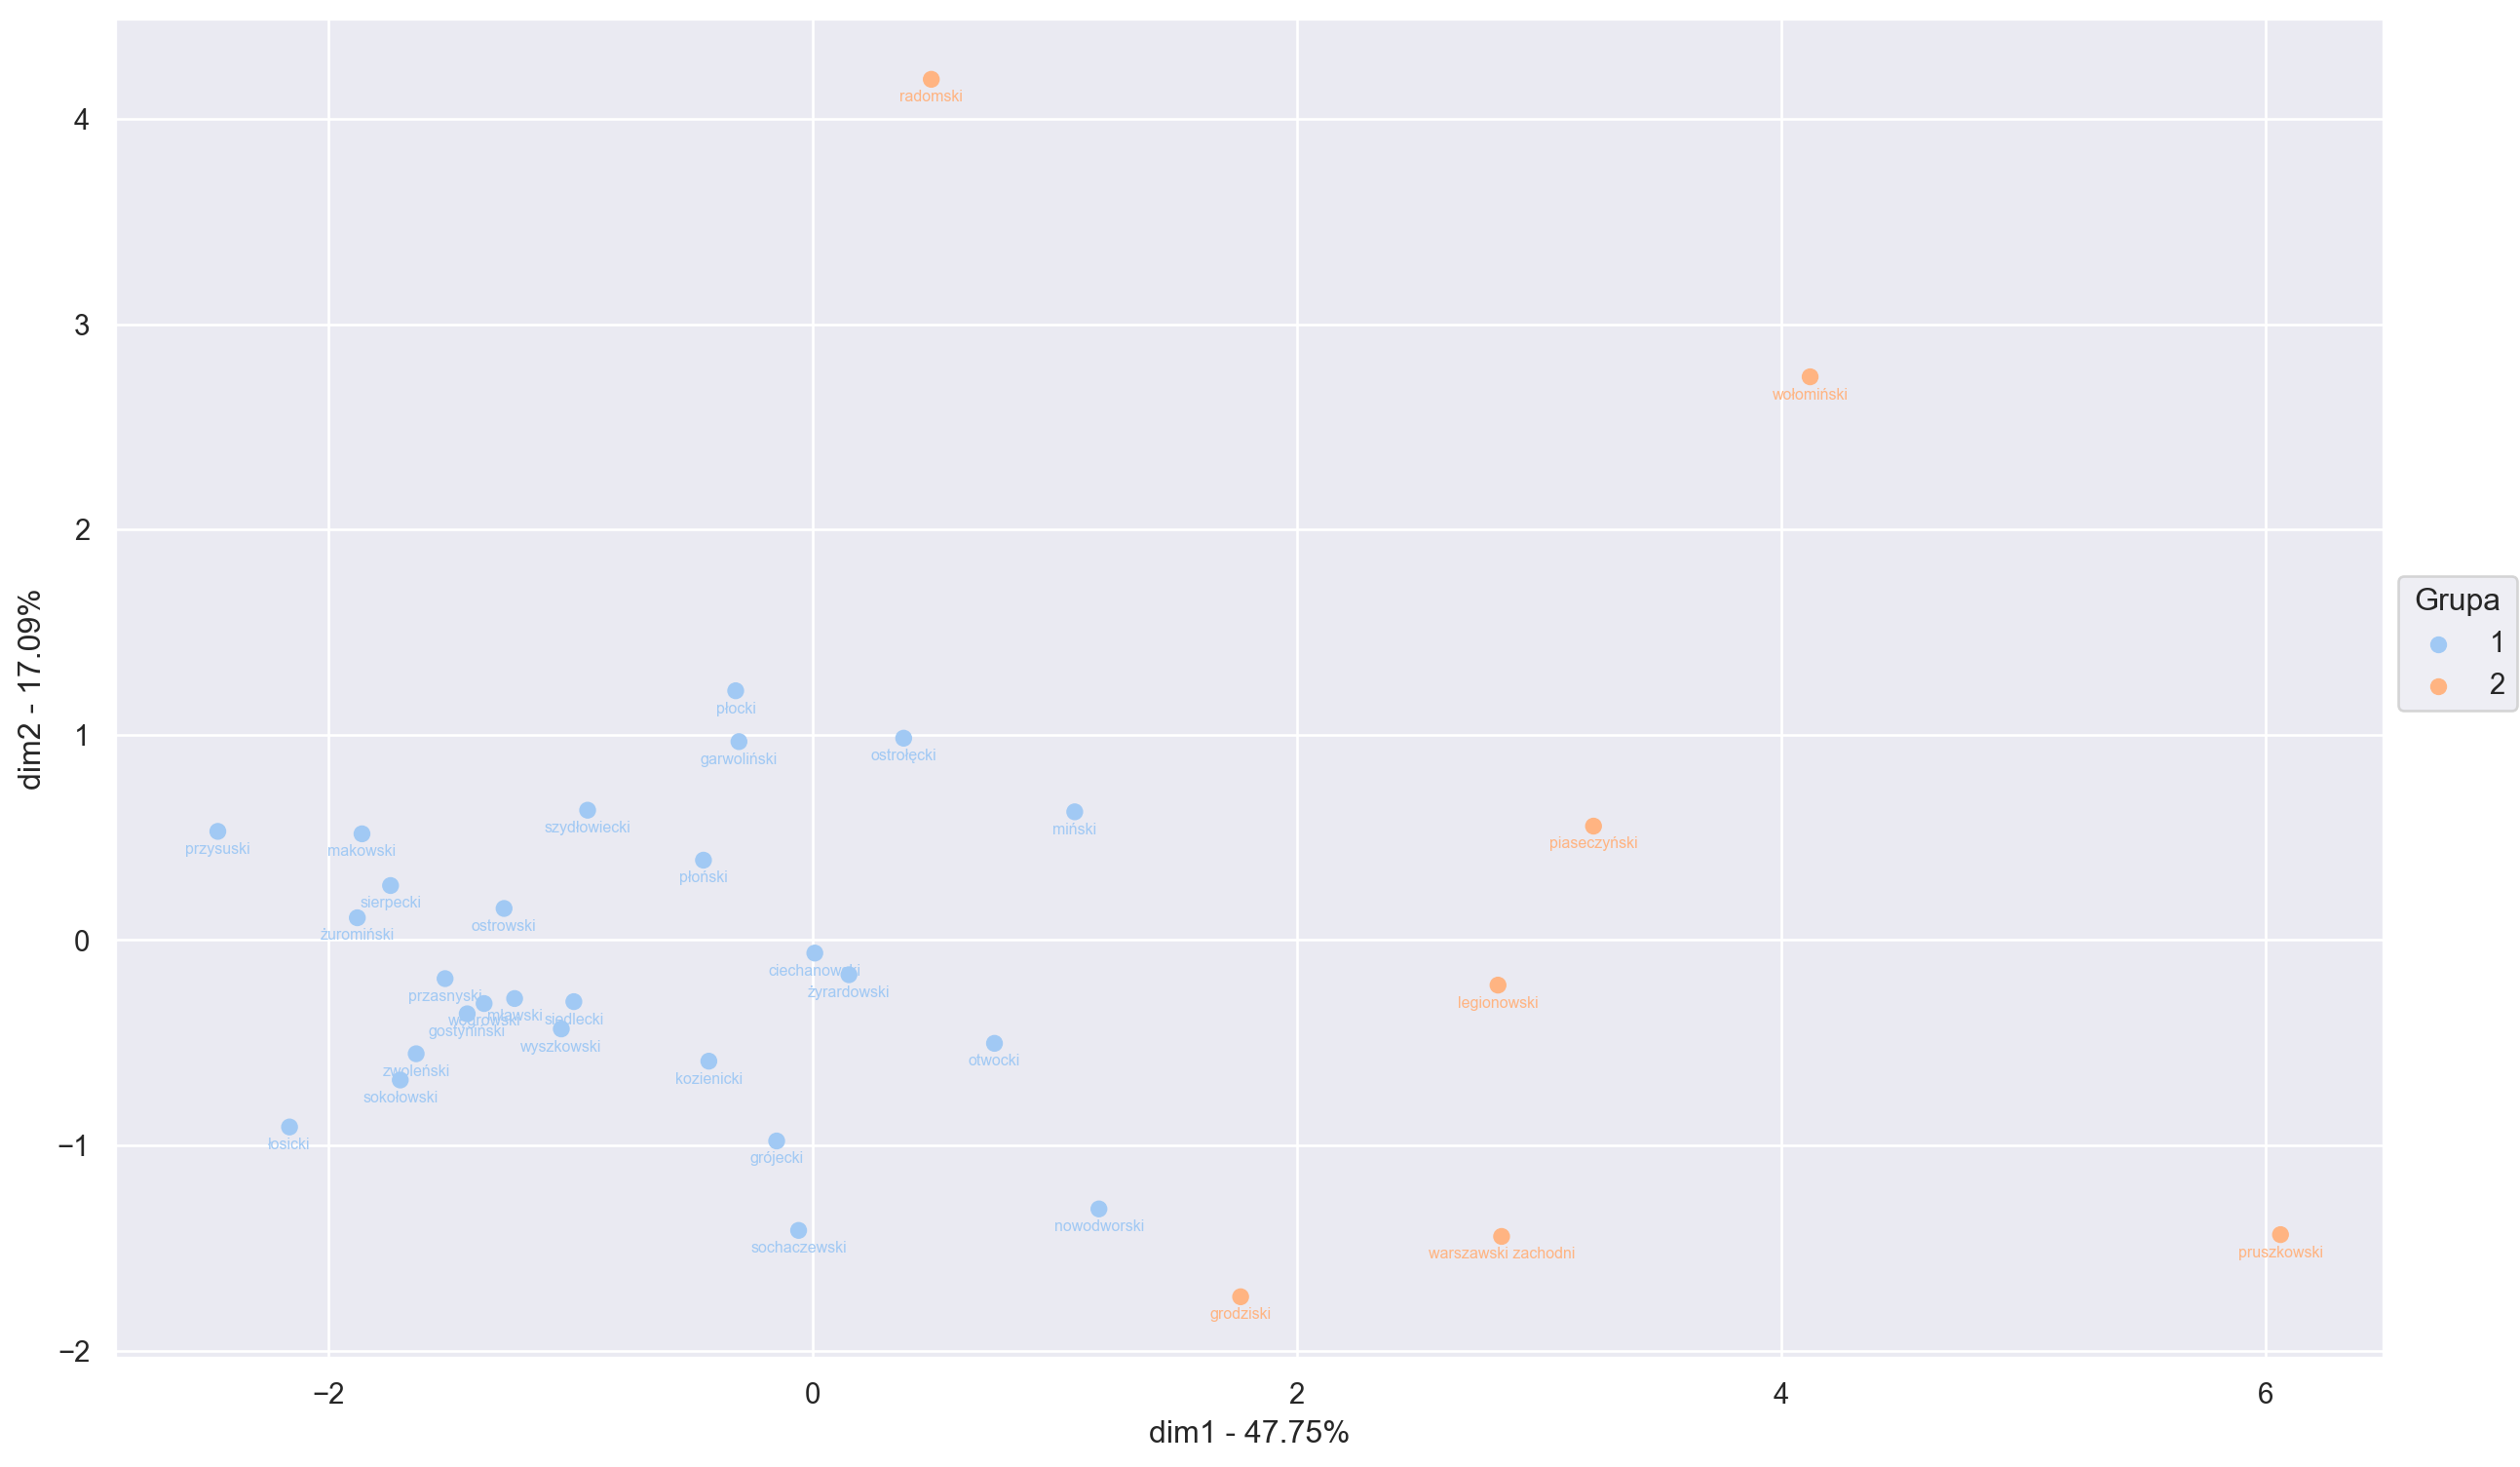

In [24]:
p = (
    so.Plot(df_final, x="dim1", y="dim2", text="POWIAT", color="ward_cluster")
    .add(so.Dot())
    .add(so.Text(valign="top", fontsize=6))
    .scale(color="pastel")
    .layout(size=(13,8))
)
p.label(x=dim1, y=dim2, color='Grupa')